In [36]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,classification_report
import seaborn as sns
from tensorflow.keras.utils import to_categorical

In [37]:
# Define the Residual Block
def residual_block(x, filters, kernel_size=3, stride=1, activation='relu'):
    # First convolutional layer in the residual block
    y = layers.Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    y = layers.BatchNormalization()(y)
    y = layers.Activation(activation)(y)

    # Second convolutional layer in the residual block
    y = layers.Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(y)
    y = layers.BatchNormalization()(y)

    # Skip connection to add the input to the output
    if stride != 1 or x.shape[-1] != filters:
        x = layers.Conv2D(filters, kernel_size=1, strides=stride, padding='same')(x)
    y = layers.Add()([x, y])

    # Activation function after the addition
    y = layers.Activation(activation)(y)

    return y

In [38]:
# Build the ResNet model
def build_resnet(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    # Initial convolutional layer with batch normalization and activation
    x = layers.Conv2D(64, 7, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # Max pooling layer
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

    # Three residual blocks
    for _ in range(3):
        x = residual_block(x, 64)

    # Global average pooling layer
    x = layers.GlobalAveragePooling2D()(x)

    # Fully connected layer for classification
    x = layers.Dense(num_classes, activation='softmax')(x)

    # Build the model
    model = models.Model(inputs, x)
    return model

In [39]:
# Define input shape and number of classes
input_shape = (28, 28, 1)
num_classes = 10

# Build and compile the model
model = build_resnet(input_shape, num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

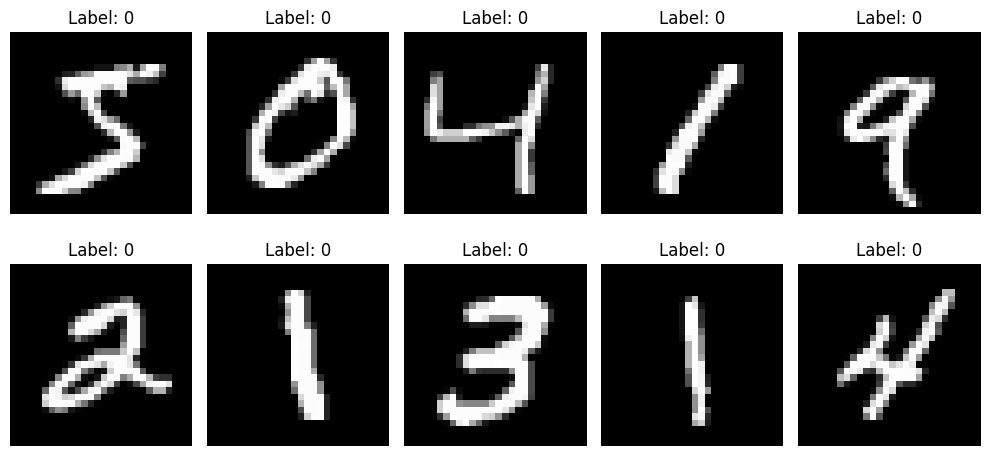

In [41]:
# Visualize sample images from the dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()
for i in range(10):
    axes[i].imshow(x_train[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Label: {np.argmax(y_train[i])}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [42]:
model.summary() # print the archticture of model

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_42 (Conv2D)          (None, 14, 14, 64)           3200      ['input_7[0][0]']             
                                                                                                  
 batch_normalization_42 (Ba  (None, 14, 14, 64)           256       ['conv2d_42[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_42 (Activation)  (None, 14, 14, 64)           0         ['batch_normalization_42

In [43]:
# Train the model
model.fit(x_train, y_train, epochs=3, batch_size=200, validation_data=(x_test, y_test))

Epoch 1/3
300/300 [==============================] - 90s 293ms/step - loss: 0.1747 - accuracy: 0.9507 - val_loss: 8.6445 - val_accuracy: 0.1135
Epoch 2/3
300/300 [==============================] - 88s 293ms/step - loss: 0.0451 - accuracy: 0.9865 - val_loss: 0.2109 - val_accuracy: 0.9370
Epoch 3/3
300/300 [==============================] - 86s 285ms/step - loss: 0.0330 - accuracy: 0.9900 - val_loss: 0.0990 - val_accuracy: 0.9700


In [44]:
y_pred = model.predict(x_test)

313/313 [==============================] - 6s 17ms/step


In [45]:
# print trainable parameters of model
for i in model.layers:
    print(f"Layer {i.name} : {i.count_params()} trainable parameters")
    print('----------------------------------------------')

Layer input_7 : 0 trainable parameters
----------------------------------------------
Layer conv2d_42 : 3200 trainable parameters
----------------------------------------------
Layer batch_normalization_42 : 256 trainable parameters
----------------------------------------------
Layer activation_42 : 0 trainable parameters
----------------------------------------------
Layer max_pooling2d_6 : 0 trainable parameters
----------------------------------------------
Layer conv2d_43 : 36928 trainable parameters
----------------------------------------------
Layer batch_normalization_43 : 256 trainable parameters
----------------------------------------------
Layer activation_43 : 0 trainable parameters
----------------------------------------------
Layer conv2d_44 : 36928 trainable parameters
----------------------------------------------
Layer batch_normalization_44 : 256 trainable parameters
----------------------------------------------
Layer add_18 : 0 trainable parameters
--------------

In [46]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

313/313 [==============================] - 5s 15ms/step - loss: 0.0990 - accuracy: 0.9700
Test Loss: 0.0990
Test Accuracy: 0.9700
